In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import numpy as np
import re
import csv

In [3]:
with open(r"C:\Users\lucyc\Desktop\mpst_full_data.csv", 'r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',')
    data = list(reader)

data = np.array(data)

In [4]:
#  imdb_id,  title,  plot_synopsis,  tags,  split,  synopsis_source
#[0_imdb_id,1_title,2_plot_synopsis,3_tags,4_split,5_synopsis_source]

In [5]:
tags_map_dict = {}
tags_total = []
index_num = 0

for tags_s in data:
    tags = re.split('[^a-zA-Z]',tags_s[3])
    tags_total += tags
    
print(len(tags_total))
tags_total = set(tags_total)
print(len(tags_total))

for tag in tags_total:
    tags_map_dict[tag] = index_num
    index_num += 1


78058
84


In [6]:
word_map_dict = {}
index_num = 0
word_count_dict = {}

for sentence in data:
    words = re.split('[^a-zA-Z]',sentence[2])
    
    for word in words:
        if word not in word_count_dict:
            word_count_dict[word] = 1
        else:
            word_count_dict[word] += 1
            
for word, count in word_count_dict.items():
    if count >= 5:
        word_map_dict[word] = index_num
        index_num += 1

In [7]:
print(len(tags_map_dict))
print(len(word_map_dict))

84
60481


In [8]:
print(tags_map_dict)

{'': 0, 'melodrama': 1, 'atmospheric': 2, 'psychological': 3, 'murder': 4, 'noir': 5, 'versus': 6, 'fiction': 7, 'boring': 8, 'claustrophobic': 9, 'fi': 10, 'provoking': 11, 'insanity': 12, 'absurd': 13, 'entertaining': 14, 'magical': 15, 'action': 16, 'inspiring': 17, 'anti': 18, 'paranormal': 19, 'autobiographical': 20, 'haunting': 21, 'depressing': 22, 'sentimental': 23, 'romantic': 24, 'humor': 25, 'evil': 26, 'dark': 27, 'avant': 28, 'grindhouse': 29, 'queer': 30, 'intrigue': 31, 'movie': 32, 'feel': 33, 'prank': 34, 'cute': 35, 'allegory': 36, 'storytelling': 37, 'plot': 38, 'mystery': 39, 'sci': 40, 'alternate': 41, 'satire': 42, 'stupid': 43, 'war': 44, 'home': 45, 'whimsical': 46, 'gothic': 47, 'thought': 48, 'good': 49, 'pornographic': 50, 'revenge': 51, 'tags': 52, 'bleak': 53, 'christian': 54, 'film': 55, 'garde': 56, 'brainwashing': 57, 'history': 58, 'horror': 59, 'cult': 60, 'suspenseful': 61, 'realism': 62, 'tragedy': 63, 'philosophical': 64, 'dramatic': 65, 'clever': 6

In [9]:
train_data = [d for d in data if d[4] == "train"]
val_data = [d for d in data if d[4] == "val"]
test_data = [d for d in data if d[4] == "test"]

In [10]:
def get_col(data,col=0):
    return np.array([d[col] for d in data])

In [11]:
t_x_o = get_col(train_data,2)
t_y_o = get_col(train_data,3)
v_x_o = get_col(val_data,2)
v_y_o = get_col(val_data,3)
test_x_o = get_col(test_data,2)
test_y_o = get_col(test_data,3)

In [12]:
t_x_o.shape

(9489,)

In [13]:
def vectorize_sequences(seq, dimension=60481):
    
    results = np.zeros((len(seq), dimension))
    
    for i, sentence in enumerate(seq):
        word_count = {}
        words = re.split('[^a-zA-Z]',sentence)
        
        for word in words:
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word] += 1
                
        for word, count in word_count.items():
            word_id = word_map_dict.get(word,None)
            if word_id:
                results[i][word_id] = count
    return results

In [14]:
def vectorize_lables(seq, dimension=84):
    results = np.zeros((len(seq), dimension))
    
    for i, lable_str in enumerate(seq):
        lables = set(re.split('[^a-zA-Z]',lable_str))
        for lable in lables:
            lable_id = tags_map_dict.get(lable,None)
            if lable_id:
                results[i][lable_id] = 1
    return results

In [15]:
t_x = vectorize_sequences(t_x_o)
v_x = vectorize_sequences(v_x_o)

In [16]:
t_y = vectorize_lables(t_y_o)
v_y = vectorize_lables(v_y_o)

In [17]:
#-------------------------------module-----------------------------------

In [31]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(500, activation='relu', input_shape=(60481,)))
model.add(layers.Dense(84, activation='sigmoid'))


In [32]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
# from keras import losses,optimizers
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
#  loss=losses.binary_crossentropy,
#  metrics=[metrics.binary_accuracy])

In [34]:
history = model.fit(
    t_x,
    t_y,
    epochs=5,
    batch_size=300,
    validation_data=(v_x, v_y))

Epoch 1/5
32/32 [==============================] - 2s 46ms/step - loss: 0.2457 - accuracy: 0.2128 - val_loss: 0.1924 - val_accuracy: 0.3670
Epoch 2/5
32/32 [==============================] - 1s 30ms/step - loss: 0.1356 - accuracy: 0.3380 - val_loss: 0.1678 - val_accuracy: 0.2520
Epoch 3/5
32/32 [==============================] - 1s 30ms/step - loss: 0.0944 - accuracy: 0.4176 - val_loss: 0.1635 - val_accuracy: 0.3586
Epoch 4/5
32/32 [==============================] - 1s 30ms/step - loss: 0.0669 - accuracy: 0.4644 - val_loss: 0.1710 - val_accuracy: 0.2992
Epoch 5/5
32/32 [==============================] - 1s 27ms/step - loss: 0.0481 - accuracy: 0.5132 - val_loss: 0.1703 - val_accuracy: 0.2440


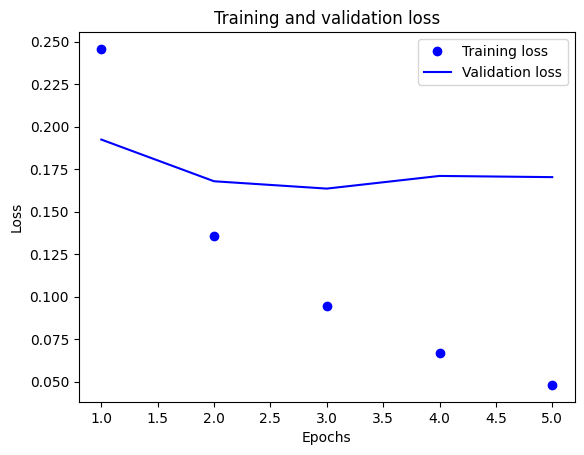

In [35]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


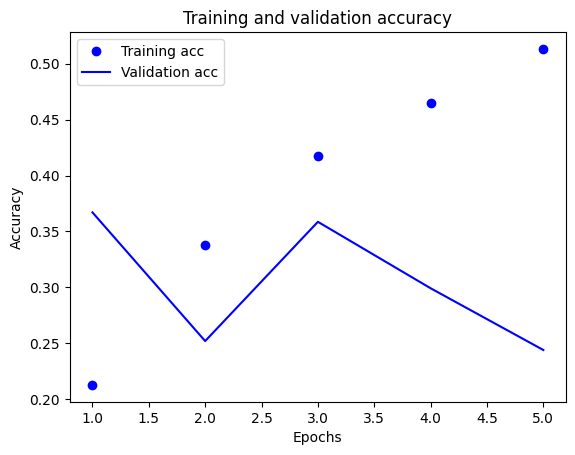

In [37]:
plt.clf()
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [56]:
sentence = """Plot
In 2067, as humanity is facing extinction following a global famine caused by ecocide, it has since abandoned scientific pursuits such as space exploration.[8] As a result, ex-NASA pilot Joseph Cooper is now forced to work as a farmer.

Cooper experiences a gravitational anomaly in his daughter Murph's bedroom. He deduces it to be a pattern of GPS coordinates and arrives at a secret NASA facility headed by Professor Brand. Brand explains to Cooper that they are trying to find an exoplanet capable of supporting life, and that he is working on solving a gravity equation to provide a way of transporting large numbers of people off the Earth. He enlists Cooper to pilot an exploratory spacecraft called the Endurance, equipped with two Ranger craft and one Lander craft, with a crew of three scientists: Romilly, Doyle, and Brand’s daughter Amelia. This is humanity's last chance; there are no more resources to mount another expedition. A wormhole has been found near Saturn, enabling the ship to pass through into another galaxy to search for a new home.

On the other side, they investigate three planets orbiting a supermassive black hole, Gargantua, with each one previously being checked by a NASA scientist-explorer. Romilly remains in orbit to study Gargantua while the others take a Ranger craft to the surface. The first planet is an ocean world of shallow water. Upon arriving at the beacon and finding debris, they realize the explorer Miller is dead, and Doyle gets swept away by a tidal wave generated by Gargantua's gravity. The wave also floods the Ranger's engines, but they dry out in time for liftoff before the craft would have been destroyed. They return to the Endurance after only one hour, but 23 years have passed due to the time dilation caused by Gargantua's gravity. Back on Earth, Murph has become a scientist and begun working with Brand.

On the second planet, the crew awaken the explorer Mann from cryostasis. He reveals to Cooper that he lied about the planet's habitability in the hope that someone would come to rescue him. Back on Earth, a dying Brand confesses to Murph that he lied about being close to a solution for the gravity equation. He put his hopes on Cooper's team finding a habitable planet and establishing a new colony using pre-fertilized eggs. Meanwhile, Romilly dies in an explosion at Mann's camp when he attempts to access the system logs of a robot booby trapped by Mann. Mann tries to kill Cooper, escapes by stealing a Ranger and attempts to hijack the Endurance. Mann then gets himself blown up when he disregards and overrides safety warnings after failing to properly dock the Ranger. After seeing the explosion, Cooper and Brand approach in the Lander and they manage to regain control of the heavily damaged spacecraft.

While all hope seems lost, Cooper comes up with a plan to use the remaining Ranger and Lander crafts to execute a fuel burn, to gain the required speed needed to initiate a slingshot maneuver around Gargantua, to propel the damaged Endurance onwards to the third and final planet. However, he has to sacrifice himself by detaching and falling into the black hole to enable Brand to reach Edmunds' planet.

Instead of being spagettified, Cooper finds himself inside a five-dimensional tesseract, out of view from beyond the event horizon. From inside he can see moments in time from inside Murph's childhood bedroom. He finds her returning to look for clues to the gravity equation, and he contacts her by manipulating items in the room with gravity to communicate through Morse code. Deducing that this construct has been created by future humans with the ability to time-travel, Cooper imparts to her the information she needs to solve the equation. The future beings return him near Saturn where he gets rescued. He is reunited with an elderly Murph, who has used the gravity equation to enable humanity's exodus from Earth. Feeling content with her life and knowing Cooper kept his word that he would come back to her, she advises him to seek out Amelia and spends the remaining moments with her family. Cooper follows Murph's advice and he sets off again to reunite with Amelia. On the final planet, Amelia removes her helmet and breathes, revealing the planet is capable of sustaining life."""

In [57]:
def vectorize_sentence(sentence, dimension=60481):
    
    results = np.zeros((dimension))

    word_count = {}
    words = re.split('[^a-zA-Z]',sentence)

    for word in words:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1

    for word, count in word_count.items():
        word_id = word_map_dict.get(word,None)
        if word_id:
            results[word_id] = count
    return results

In [58]:
res = vectorize_sentence(sentence)
res = np.expand_dims(res, axis=0)

In [59]:
predictions = model.predict(res)

In [60]:
result = []
tags_map_dict_rev = {v: k for k, v in tags_map_dict.items()}

for i, val in enumerate(predictions[0]):
    result.append([tags_map_dict_rev[i],val])
    
result.sort(key = lambda x : x[1], reverse = True)

In [61]:
print(result)

[['romantic', 0.93138224], ['flashback', 0.47419685], ['thought', 0.46209967], ['psychedelic', 0.46065032], ['inspiring', 0.4037679], ['action', 0.3179237], ['sentimental', 0.30676913], ['fi', 0.29237133], ['sci', 0.2302806], ['comedy', 0.20458792], ['provoking', 0.18124522], ['good', 0.16359851], ['suspenseful', 0.14851458], ['philosophical', 0.11208865], ['alternate', 0.09132154], ['humor', 0.06940143], ['psychological', 0.06272873], ['cult', 0.061184183], ['boring', 0.059867572], ['murder', 0.057110373], ['mystery', 0.05593925], ['atmospheric', 0.055339824], ['stupid', 0.037446078], ['depressing', 0.031865645], ['melodrama', 0.031862512], ['versus', 0.030456202], ['paranormal', 0.03008763], ['dark', 0.027181251], ['satire', 0.026669947], ['entertaining', 0.026386952], ['evil', 0.026339738], ['tragedy', 0.023597157], ['realism', 0.023315806], ['absurd', 0.022333479], ['historical', 0.021484135], ['violence', 0.02007299], ['revenge', 0.016699912], ['history', 0.01624067], ['fantasy', 